### Analysis 1

#### Part 1.1: Implement two regression models for the number of births

+ Model 1: predictor is the number of storks (as given in the paper)
+ Model 2: predictor is the population size  

Show the fit of the two models with suitable scatter plots and metrics; explain these briefly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

%matplotlib inline

In [2]:
pre = pd.read_csv('storks.csv')

display(pre)

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


In [12]:
# Model 1 
y = pre.BirthRate# this is the target variable;
X = pre.Storks.values.reshape(-1,1)


reg = LinearRegression().fit(X, y)
y_hat = reg.predict(X)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error: 312.03


Text(0, 0.5, 'the number of births ($10^3/yr$)')

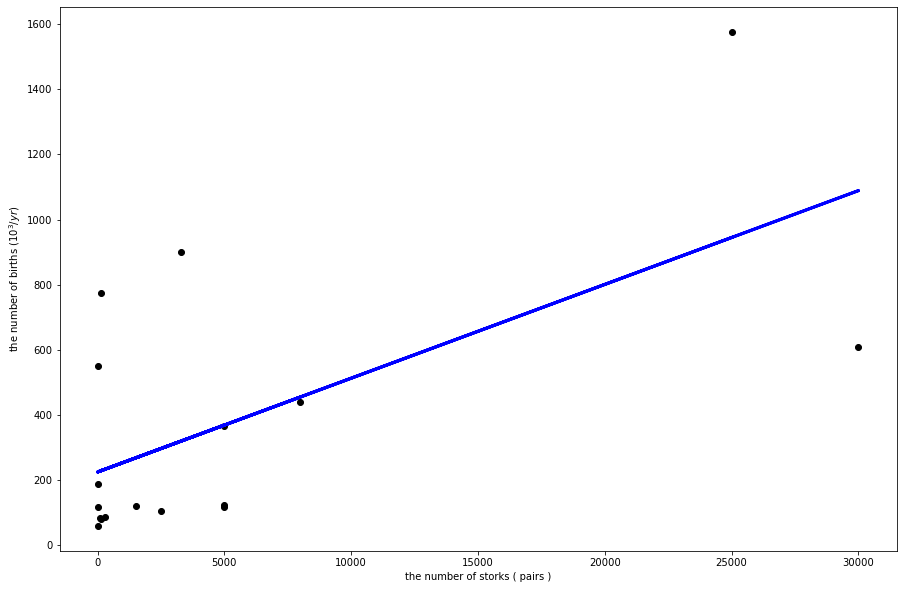

In [13]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(X, y,  color='black')
a.plot(X, y_hat, color='blue', linewidth=3)
a.set_xlabel('the number of storks ( pairs )')
a.set_ylabel('the number of births ($10^3/yr$)')

In [21]:
# Model 2 
y_2 = pre.BirthRate# this is the target variable;
X_2 = pre.Humans.values.reshape(-1,1)


reg_2 = LinearRegression().fit(X_2, y_2)
y_hat_2 = reg_2.predict(X_2)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y_2, y_hat_2, squared=False))

Root of the mean squared error: 208.78


Text(0, 0.5, 'the number of births ( $10^3/yr$ )')

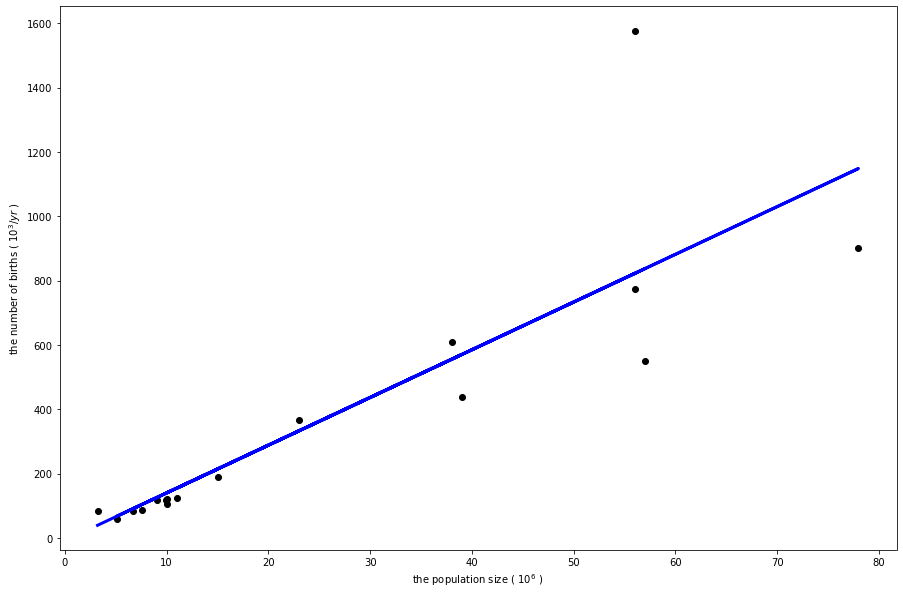

In [15]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(X_2, y_2,  color='black')
a.plot(X_2, y_hat_2, color='blue', linewidth=3)
a.set_xlabel('the population size ( $10^6$ )')
a.set_ylabel('the number of births ( $10^3/yr$ )')

***It is in positive relationships in both models, and the regression between the population and the birth is more fitted than the regression between the storks and the birth, because it has a smaller squared error.***

#### Part 1.2: Use the bootstrap technique to estimate the distribution of the difference in the r2 parameter for the two models.

In [16]:
# data - the sample; can be dataframe or an array
# cols - a list of column headings in the results dataframe
# repeats - the number of times the process is repeated
# func - the function that calculates the results for each sample: must return a value for each column

def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

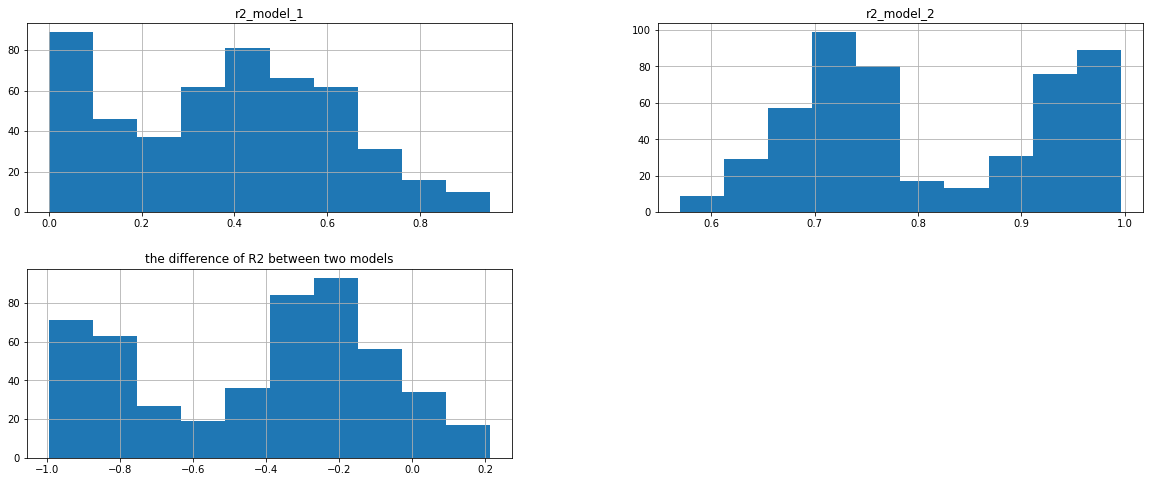

In [17]:
def doRegression(df) :
    #Resample the data
    y = df.BirthRate# this is the target variable;
    X = df.Storks.values.reshape(-1,1)
    X_2 = df.Humans.values.reshape(-1,1)
    #fit both models
    reg = LinearRegression().fit(X, y)
    reg_2= LinearRegression().fit(X_2, y)
    # calculate the difference in the r2 parameter for the two models
    R2 = reg.score(X, y)
    R2_2 = reg_2.score(X_2, y)
    return [R2, R2_2, (R2 - R2_2)]

#Repeat these steps many times and plot a distribution of the differences
bstrap = bootstrapC(pre, ['r2_model_1','r2_model_2','the difference of R2 between two models'], 500, doRegression) 
_ = bstrap.hist(figsize=(20,8))

In [18]:
#Estimate appropriate confidence intervals
r2 = bstrap.iloc[:,0]
r2_2 = bstrap.iloc[:,1]
dif = bstrap.iloc[:,2]

print("The difference between r2 values (storks - humans)  is with 80%% CI %3.2f to %3.2f" % 
      (dif.quantile(0.1), dif.quantile(0.9)))
print("The difference between r2 values (storks - humans)  is with 90%% CI %3.2f to %3.2f" % 
      (dif.quantile(0.05), dif.quantile(0.95)))
print("The difference between r2 values (storks - humans)  is with 99%% CI %3.2f to %3.2f" % 
      (dif.quantile(0.005), dif.quantile(0.995)))

The difference between r2 values (storks - humans)  is with 80% CI -0.90 to -0.02
The difference between r2 values (storks - humans)  is with 90% CI -0.94 to 0.05
The difference between r2 values (storks - humans)  is with 99% CI -0.98 to 0.15


We can easily find that $R^2$ of model 1 is more close to 0 than model 2, so we can be confident that the population size explains more of the variability in the number of births.Estimate appropriate confidence intervals

### Analysis 2

#### Part 2.1: Implement two regression models for the number of storks

+ Model 1: predictor is the land area
+ Model 2: predictors are i) the population density and ii) the area of suitable land  

Show the fit of the two models with suitable scatter plots and metrics; explain these briefly.

In [22]:
# Model 1 
y_3 = pre.Storks# this is the target variable;
X_3 = pre.Area.values.reshape(-1,1)


reg_3 = LinearRegression().fit(X_3, y_3)
y_hat_3 = reg_3.predict(X_3)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat_3, squared=False))

Root of the mean squared error: 6568.49


Text(0, 0.5, 'the number of storks ( pairs )')

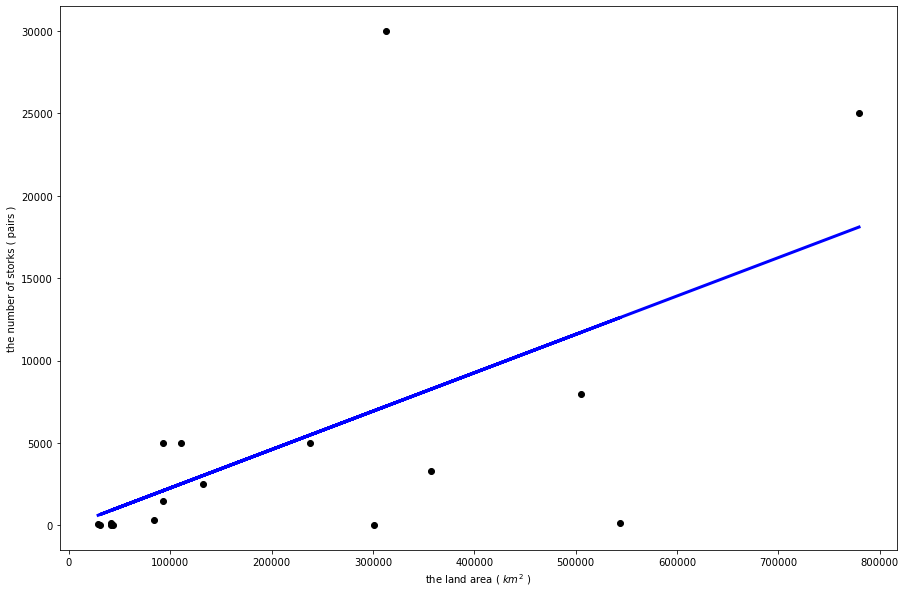

In [24]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(X_3, y_3,  color='black')
a.plot(X_3, y_hat_3, color='blue', linewidth=3)
a.set_xlabel('the land area ( $km^2$ )')
a.set_ylabel('the number of storks ( pairs )')

In [26]:
# Model 2 
population_density = pre.Humans/pre.Area
suitable_land = pre.Area*pre.SuitableAreaPercent/100

y_4 = pre.Storks# this is the target variable;
X_4 = np.column_stack((population_density,suitable_land))


reg_4 = LinearRegression().fit(X_4, y_4)
y_hat_4 = reg_4.predict(X_4)

# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y_4, y_hat_4, squared=False))

Root of the mean squared error: 6677.03


Text(0, 0.5, 'Actual number of storks ( pairs )')

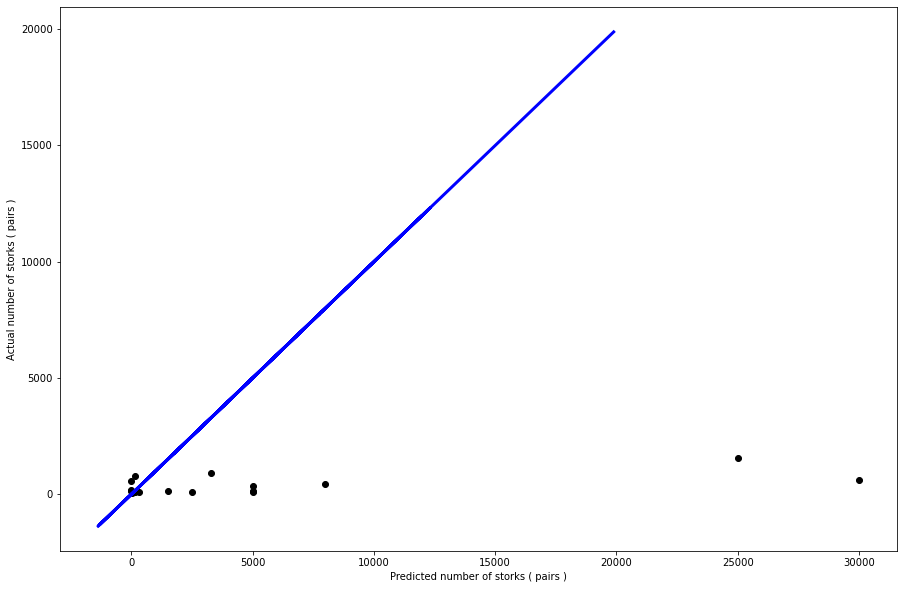

In [30]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_4, y,  color='black')
a.plot( y_hat_4, y_hat_4, color='blue', linewidth=3)
a.set_xlabel('Predicted number of storks ( pairs )')
a.set_ylabel('Actual number of storks ( pairs )')

***The mean squared error of two models is closed, so it is hard to judge which one is more fitted.***

#### Part 2.2: Use the bootstrap technique to estimate the difference in the root mean squared error (RMSE) between the predicted and actual values for the two models

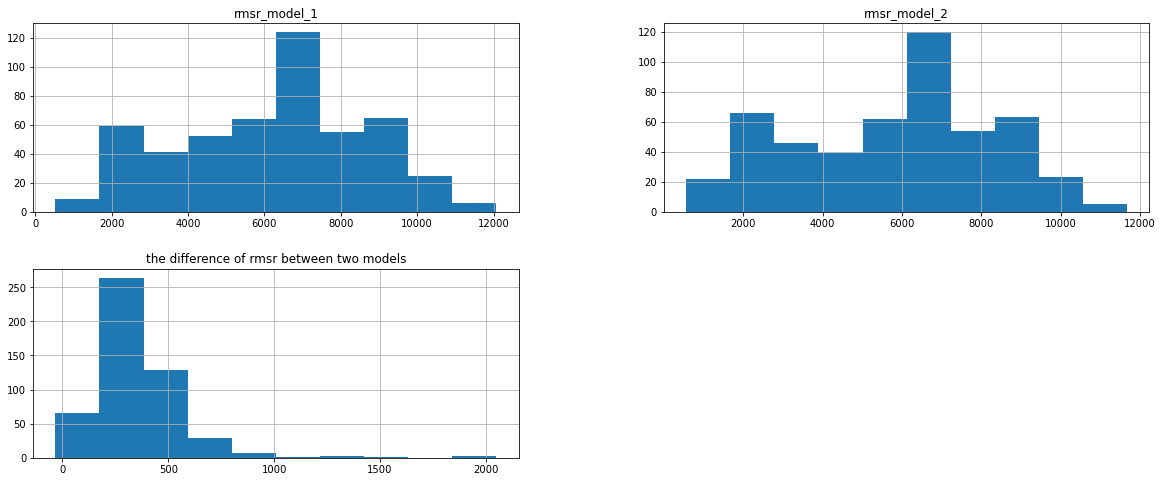

In [33]:
def doRegression(df) :
    #Resample the data
    y_3 = df.Storks# this is the target variable;
    X_3 = df.Area.values.reshape(-1,1)
    X_4 = np.column_stack((df.Humans/df.Area,df.Area*df.SuitableAreaPercent/100))
    
    #fit both models
    reg_3 = LinearRegression().fit(X_3, y_3)
    reg_4= LinearRegression().fit(X_4, y_3)
    # calculate the difference in the RMSE for the two models
    RMSR = mean_squared_error(y_3, reg_3.predict(X_3), squared=False)
    RMSR_2 = mean_squared_error(y_3, reg_4.predict(X_4), squared=False)
    return [RMSR, RMSR_2, (RMSR - RMSR_2)]

#Repeat these steps many times and plot a distribution of the differences
bstrap = bootstrapC(pre, ['rmsr_model_1','rmsr_model_2','the difference of rmsr between two models'], 500, doRegression) 
_ = bstrap.hist(figsize=(20,8))

In [34]:
#Estimate appropriate confidence intervals
rsmr = bstrap.iloc[:,0]
rsmr_2 = bstrap.iloc[:,1]
dif_rsmr = bstrap.iloc[:,2]

print("The difference between r2 values (storks - humans)  is with 80%% CI %3.2f to %3.2f" % 
      (dif_rsmr.quantile(0.1), dif_rsmr.quantile(0.9)))
print("The difference between r2 values (storks - humans)  is with 90%% CI %3.2f to %3.2f" % 
      (dif_rsmr.quantile(0.05), dif_rsmr.quantile(0.95)))
print("The difference between r2 values (storks - humans)  is with 99%% CI %3.2f to %3.2f" % 
      (dif_rsmr.quantile(0.005), dif_rsmr.quantile(0.995)))

The difference between r2 values (storks - humans)  is with 80% CI 162.18 to 577.08
The difference between r2 values (storks - humans)  is with 90% CI 118.72 to 700.57
The difference between r2 values (storks - humans)  is with 99% CI 25.44 to 1456.10


***From the estimated confidence intervals, it is easily to find that the RSMR of model 1 is always larger than model 2, therefore we may infer that the land area predicts the number of storks better than the other.***